# Logistic Regression

### Geral

A regressão logística é uma técnica supervisionada de classificação linear e binária. É paramétrica, pois possui admite que o log dos odds segue uma distribuição linear, portanto que assim possui aspectos em comum com a regressão linear - porém é adaptado para a classificação.

Dado o produto dos coeficientes com a matriz de variáveis explicativas - aplica-se a função sigmoide -  transformando a saída entre valores de 0 a 1, que podem ser interpretado como probabilidades.

**Pontos importantes**

- Ao final se comportamento linear do log dos odds em função da variáveis explicativas.
	
- A regressão logística possui outputs binários ($y∈{0,1}$),  onde, em geral, utilizando 0,5 como threshold para se dividir as classes :

	$ \hat{y} ̂=1$ , se $h_{θ} (X)≥0.5$
    
    $ \hat{y} ̂=0$ , se $h_{θ} (X)<0.5$


- Os parâmetros θ devem ser aprendidos utilizando a técnica de maximum likelihood ou minimização da cross entropia
	
- Em contraste com Naive Bayes, a regressão logística modela a probabilidade condicional $p(Y|X)$ enquanto que Naive Bayes modela a distribuição de probabilidade conjunta $p(X,Y) = p(Y|X).p(X)$. Regressão logística é um modelo discriminativo, enquanto que Naive Bayes é um modelo generativo
	
- Pode ser utilizada em conjunto com técnicas de regularização - para se proporcionar melhor generalização

### Pros e Contras

**Vantagens** 
- Premissa simplista, garante alta explicabilidade
- Gera resposta diretamente interpretáveis como probabilidades
- Os betas dos modelos trazem a importância de classificação no modelo (feature importance) de interpretação direta na classificação
- Overfitting pode ser combatidado associando a técnica com shrinkage (lasso, ridge, elastic net entre outros)
- Baixo custo de memória - ao final é necessário se armazenar somente um vetor de coeficientes
- Baixa complexidade computacional

**Desvantagem**
- Por ser paramétrico, pode não conseguir capturar relacionamento que fogem da premissa adotada(comportamento linear). Para tal, seria necessário fazer transformações nos features.
- É um linear classifier, ou seja, não funciona bem caso as variáveis não sejam linearmente separáveis, ou seja, tem dificuldade de capturar relações mais complexas entre as variáveis respostas e o output do modelo
- Pode sofrer overfit caso as variáveis forem altamente correlacionadas

### Principais Parametros

Como na regressão linear, na regressão logística, pode-se aplicar regularização para penalizar os coeficientes de maior magnetude (aumenta viés diminuí variância)

Assim, os principais parâmetros a serem ajustados referem-se a regularização:
- penalty: Define o tipo de penalidade -  se trata-se de lasso, ridge ou elastic-net
- C : inverso da regularização 1/λ  - quanto maior o seu valor, menor a penalização (menores valores implicam em maior penalização)

In [1]:
# from sklearn.datasets import load_digits
# digits = load_digits()

In [8]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [10]:
import os, sys

sys.path.append(r'..\functions')
import model_functions, EDA

C:\Users\fabio\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
from importlib import reload

reload(model_functions)
reload(EDA)

<module 'EDA' from '..\\functions\\EDA.py'>

# Example of code, plotting logistic regression curve

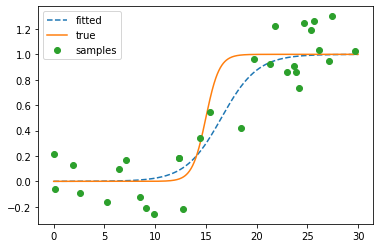

In [5]:
from scipy.optimize import curve_fit

def sigmoid(x, k, x0):

    return 1.0 / (1 + np.exp(-k * (x - x0)))

# Parameters of the true function

n_samples = 1000
true_x0 = 15
true_k = 1.5
sigma = 0.2

# Build the true function and add some noise
x = np.linspace(0, 30, num=n_samples)
y = sigmoid(x, k=true_k, x0=true_x0) 
y_with_noise = y + sigma * np.random.randn(n_samples)

# Sample the data from the real function (this will be your data)
some_points = np.random.choice(1000, size=30)  # take 30 data points
xdata = x[some_points]
ydata = y_with_noise[some_points]

# Fit the curve
popt, pcov = curve_fit(sigmoid, xdata, ydata)
estimated_k, estimated_x0 = popt

# Plot the fitted curve
y_fitted = sigmoid(x, k=estimated_k, x0=estimated_x0)

# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_fitted, '--', label='fitted')
ax.plot(x, y, '-', label='true')
ax.plot(xdata, ydata, 'o', label='samples')
ax.legend()

In [15]:
sigmoid(-1)

1.5819767068693265

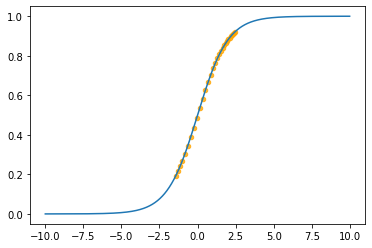

In [18]:
sigmoid = lambda z: 1/(1+np.exp(1)**(-z))
grad = lambda x: (sigmoid(x) - sigmoid(x-0.05))/0.05
x=np.arange(-10,10,.01)
y= [sigmoid(x) for x in x]
beta0=2.5
betas=[]

for i in range(30):
    beta1= beta0 - 0.8*grad(beta0)
    beta0=beta1
    betas.append(beta0)

betas = np.array(betas)

    
plt.plot(x,y);
plt.scatter(betas,[sigmoid(betas) for betas in betas], s=20, alpha=0.8, c='orange');

(-5.0, 5.0)

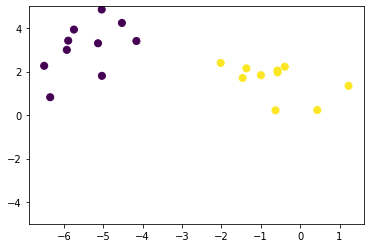

In [148]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=20,n_features=2,centers=2)
plt.scatter(X[:,0],X[:,1], c=y, s=50)
plt.ylim(-5,5)

(-5.0, 5.0)

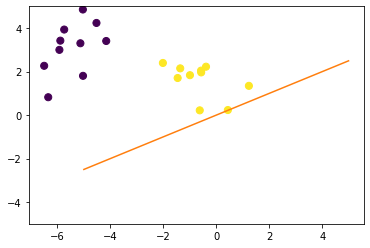

In [155]:
betas = np.array([0.5 ,0.5])
x=np.array([(1,x) for x in np.arange(-5,5,0.01)])

plt.scatter(X[:,0],X[:,1], c=y, s=50)
plt.plot(x, x*betas);
plt.ylim(-5,5)

In [156]:
J = lambda betas: np.sum(y*np.log(sigmoid((X*betas).sum(axis=1))) + (1-y)*np.log(1-sigmoid((X*betas).sum(axis=1))))
gradJ = lambda x: (J(x) - J(x-0.01))/0.01
betas_list=[]

beta0 = betas[0]
beta1= betas[1]

for i in range(100):
    beta0_= beta0 - 0.01*gradJ(betas)
    beta0=beta0_
    
    beta1_= beta1 - 0.01*gradJ(betas)
    beta1=beta1_
    
    betas=np.array([beta0 ,beta1])
#     print(betas)
    betas_list.append(betas)
    


C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


(-5.0, 5.0)

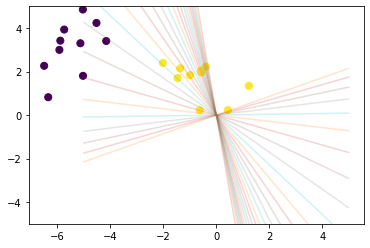

In [157]:
plt.scatter(X[:,0],X[:,1], c=y, s=50)
plt.plot(x, x*betas, alpha=1, c='red',lw=5);
for betas_ in betas_list:
    plt.plot(x, x*betas_, alpha=0.2);
    
plt.ylim(-5,5)

# Case 0 - Social Network Ads

In [6]:
dataset=pd.read_csv(r"../Data/Social_Network_Ads.csv")

In [7]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

In [11]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


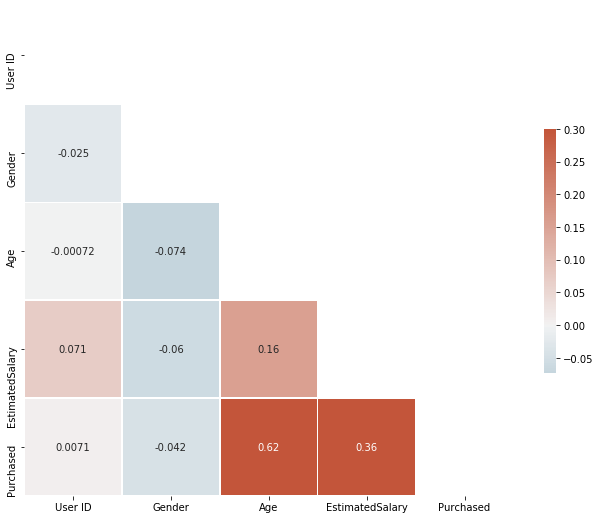

In [12]:
EDA.print_correlation_matrix(dataset)

In [108]:
X_columns =['Age', 'EstimatedSalary']
target = 'Purchased'

# Splitting training and testing
X_train, X_test, y_train, y_test= train_test_split(dataset[X_columns],
                                                   dataset[target],
                                                   test_size=0.25, 
                                                   random_state=0)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

# Feature Scaling
# scaler = {}
# for column in X_train.columns.to_list():
#     scaler[column] = StandardScaler()
#     X_train[column] =scaler[column].fit_transform(X_train[[column]])
#     X_test[column]=scaler[column].transform(X_test[[column]])

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

X_train shape:(300, 2)
y_train shape:(300,)
X_test shape:(100, 2)
y_test shape:(100,)


In [109]:
classifier= LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [110]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.823
Test set score:0.890


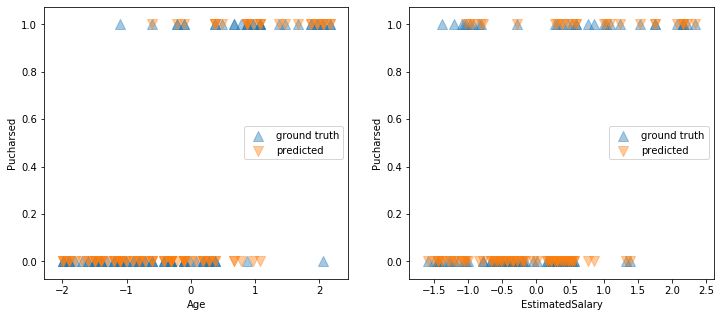

In [111]:
num_X=X.shape[1]

fig, axes= plt.subplots(1,num_X,figsize=(12,5))

for i,ax in zip(range(0,3),axes):
#     ax.plot(X_train[:,i], y_train, 'o')
    ax.scatter(X_test.iloc[:,i], y_test, marker='^', s=100, alpha=0.4, label='ground truth')
    ax.scatter(X_test.iloc[:,i], y_pred_test, marker='v', s=100, alpha=0.4, label  = 'predicted')
    ax.set_xlabel(X_test.columns[i])
    ax.set_ylabel('Pucharsed')
    ax.legend(loc='best')

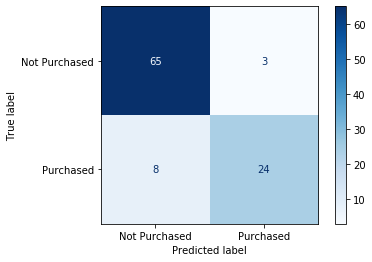

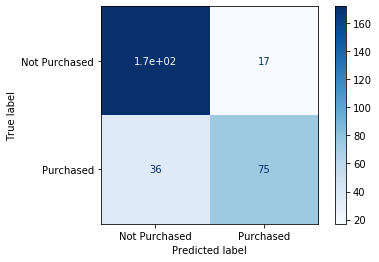

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Not Purchased','Purchased'], cmap =plt.cm.Blues);
plot_confusion_matrix(classifier, X_train, y_train, display_labels=['Not Purchased','Purchased'], cmap =plt.cm.Blues);

In [146]:
def plot_decision_function(x1_axis,x2_axis,target, proba=False):

    fig, axis = plt.subplots(1,1, figsize=(20,10))

    X1, X2 = np.meshgrid(np.arange(start= X_train[x1_axis].min() -1, stop= X_train[x1_axis].max() +1, step = 0.01),
                         np.arange(start= X_train[x2_axis].min()-1, stop= X_train[x2_axis].max() +1, step = 0.01))


    if (proba):
        predictions = classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:,1].reshape(X1.shape)
    else:
        predictions = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # plota no treino
    train = pd.concat([X_train, y_train.reset_index()], axis=1)
    train.plot(x = x1_axis, y =x2_axis, c=target, kind = 'scatter', cmap = 'Spectral', s=100, alpha =0.6, ax=axis)
    axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)
    axis.set_title('Superfície de Decisão - Treino')
    plt.show()
    
    # plota no teste
    fig, axis = plt.subplots(1,1, figsize=(20,10))

    test = pd.concat([X_test, y_test.reset_index()], axis=1)
    test.plot(x = x1_axis, y =x2_axis, c=target, kind = 'scatter', cmap = 'Spectral', s=100, alpha =0.6, ax=axis)
    axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)
    axis.set_title('Superfície de Decisão - Teste')
    plt.show()
    

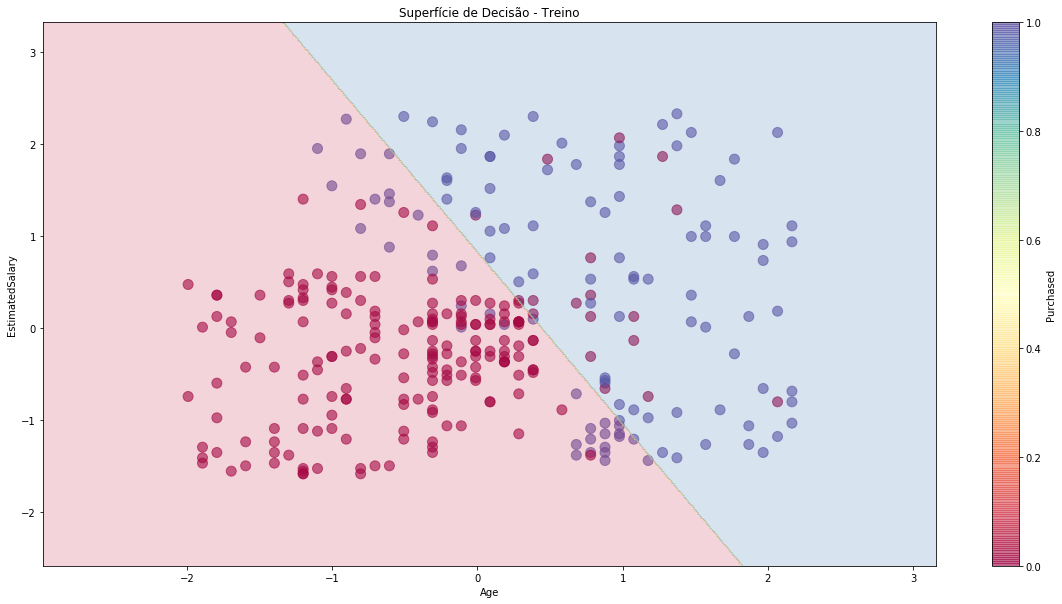

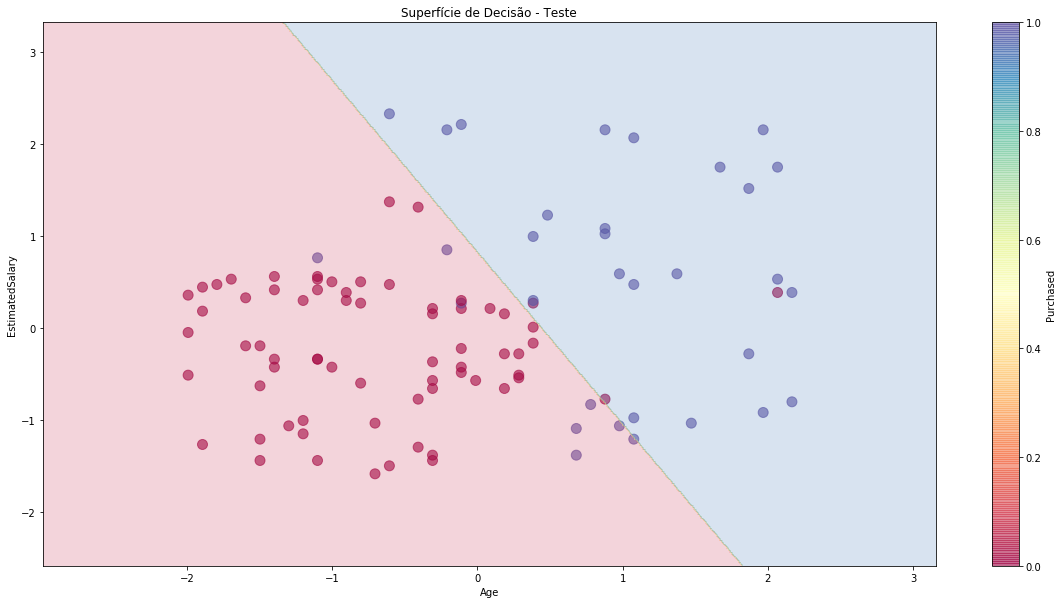

In [147]:
x1_axis = 'Age'
x2_axis= 'EstimatedSalary'
target = 'Purchased'

plot_decision_function(x1_axis,x2_axis,target, proba=False)

In [118]:
# from matplotlib.colors import ListedColormap

# figure=plt.figure(figsize=(15,10))

# X1, X2 = np.meshgrid(np.arange(start= X_train.iloc[:,0].values.min() -1, stop= X_train.iloc[:,0].values.max() +1, step = 0.01),
#                      np.arange(start= X_train.iloc[:,1].values.min() -1, stop= X_train.iloc[:,1].values.max() +1, step = 0.01))
# plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
#                                                                                     cmap= ListedColormap(('red','green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i,j in enumerate(np.unique(y_train)):
#     plt.scatter(np.array(X_train)[y_train== j,0], np.array(X_train)[y_train==j, 1],
#                c=ListedColormap(('red','green'))(i), label=j)
    
# plt.title('Logistic Regression(Training Set)')
# plt.xlabel('feature 0')
# plt.ylabel('feature 1')
# plt.legend(loc='best')

# figure=plt.figure(figsize=(15,10))

# X1, X2 = np.meshgrid(np.arange(start= X_test.iloc[:,0].values.min() -1, stop= X_test.iloc[:,0].values.max() +1, step = 0.01),
#                      np.arange(start= X_test.iloc[:,1].values.min() -1, stop= X_test.iloc[:,1].values.max() +1, step = 0.01))
# plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
#                                                                                     cmap= ListedColormap(('red','green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i,j in enumerate(np.unique(y_test)):
#     plt.scatter(np.array(X_test)[y_test== j,0], np.array(X_test)[y_test==j, 1],
#                c=ListedColormap(('red','green'))(i), label=j)
    
# plt.title('Logistic Regression(testing Set)')
# plt.xlabel('feature 0')
# plt.ylabel('feature 1')
# plt.legend(loc='best')

C:\Users\fabio\Anaconda\lib\site-packages\mglearn\plot_2d_separator.py:101: UserWarning: No contour levels were found within the data range.
  linestyles=linestyle, zorder=5)
C:\Users\fabio\Anaconda\lib\site-packages\mglearn\plot_2d_separator.py:101: UserWarning: No contour levels were found within the data range.
  linestyles=linestyle, zorder=5)


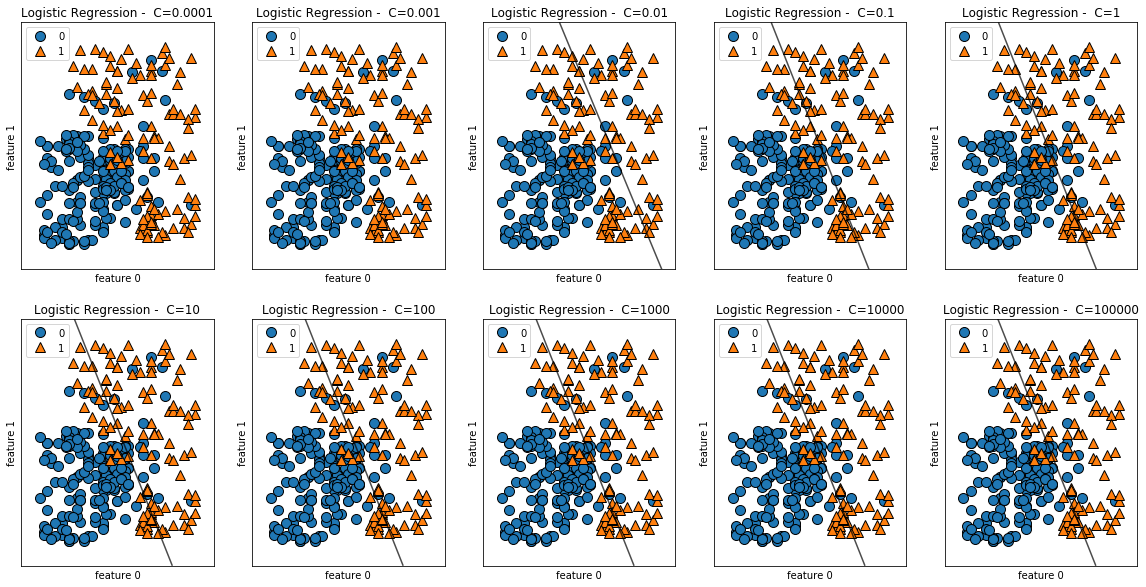

In [123]:
import mglearn

betas = {}

fig, axis = plt.subplots(2,5, figsize=(20,10))

for C, ax_ in zip([.0001,.001, .01,.1,1,10,100,1000,10000,100000], axis.ravel()):
    classifier= LogisticRegression(penalty='l2',C=C)
    classifier.fit(X_train, y_train)
    betas[C] = list(classifier.intercept_) + list(classifier.coef_[0])
    y_pred = classifier.predict(X_test)
    mglearn.plots.plot_2d_separator(classifier, X_train.values, fill=False, eps=0.5, alpha=.7,ax=ax_)
    mglearn.discrete_scatter(X_train.iloc[:,0].values, X_train.iloc[:,1].values,y_train, ax=ax_)
    ax_.set_title('Logistic Regression -  C={}'.format(C))
    ax_.set_xlabel('feature 0')
    ax_.set_ylabel('feature 1')
    ax_.legend(loc='best')
#     plt.show()

In [132]:
from sklearn.model_selection import GridSearchCV

basemodel = LogisticRegression(random_state=42)

param_grid =     {'penalty' : ['l1', 'l2'],
                  'C' : np.logspace(-4, 4, 20)}

gridsearch = GridSearchCV(basemodel,
                          param_grid,
                          cv=5,
                          scoring=['accuracy', 'roc_auc', 'f1'],
                          return_train_score=True,
                          refit= 'roc_auc',
                          verbose=3)

#fit model to data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV]  C=0.0001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV]  C=0.0001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV]  C=0.0001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV]  C=0.0001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV]  C=0.0001, penalty=l1, accuracy=(train=nan, test=nan),

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit faile

[CV]  C=0.0018329807108324356, penalty=l2, accuracy=(train=0.629, test=0.633), f1=(train=0.000, test=0.000), roc_auc=(train=0.931, test=0.835), total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2 .............................
[CV]  C=0.0018329807108324356, penalty=l2, accuracy=(train=0.629, test=0.633), f1=(train=0.000, test=0.000), roc_auc=(train=0.913, test=0.929), total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2 .............................
[CV]  C=0.0018329807108324356, penalty=l2, accuracy=(train=0.633, test=0.617), f1=(train=0.000, test=0.000), roc_auc=(train=0.894, test=0.982), total=   0.0s
[CV] C=0.004832930238571752, penalty=l1 ..............................
[CV]  C=0.004832930238571752, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=0.004832930238571752, penalty=l1 ..............................
[CV]  C=0.004832930238571752, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\skle

[CV]  C=0.08858667904100823, penalty=l2, accuracy=(train=0.821, test=0.817), f1=(train=0.723, test=0.732), roc_auc=(train=0.913, test=0.915), total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV]  C=0.08858667904100823, penalty=l2, accuracy=(train=0.829, test=0.767), f1=(train=0.739, test=0.632), roc_auc=(train=0.927, test=0.874), total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV]  C=0.08858667904100823, penalty=l2, accuracy=(train=0.833, test=0.717), f1=(train=0.744, test=0.514), roc_auc=(train=0.931, test=0.844), total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV]  C=0.08858667904100823, penalty=l2, accuracy=(train=0.804, test=0.883), f1=(train=0.697, test=0.829), roc_auc=(train=0.912, test=0.929), total=   0.0s
[CV] C=0.08858667904100823, penalty=l2 ...............................
[CV]  C=0.08858667904100823, penalty=l2, accuracy=(train=0.779, test=0.900), f1=(train=0.644

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\skle

[CV]  C=1.623776739188721, penalty=l2, accuracy=(train=0.800, test=0.933), f1=(train=0.700, test=0.905), roc_auc=(train=0.897, test=0.981), total=   0.0s
[CV] C=4.281332398719396, penalty=l1 .................................
[CV]  C=4.281332398719396, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=4.281332398719396, penalty=l1 .................................
[CV]  C=4.281332398719396, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=4.281332398719396, penalty=l1 .................................
[CV]  C=4.281332398719396, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=4.281332398719396, penalty=l1 .................................
[CV]  C=4.281332398719396, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=  

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\skle

[CV]  C=78.47599703514607, penalty=l2, accuracy=(train=0.850, test=0.683), f1=(train=0.786, test=0.486), roc_auc=(train=0.931, test=0.846), total=   0.0s
[CV] C=78.47599703514607, penalty=l2 .................................
[CV]  C=78.47599703514607, penalty=l2, accuracy=(train=0.812, test=0.883), f1=(train=0.731, test=0.829), roc_auc=(train=0.912, test=0.931), total=   0.0s
[CV] C=78.47599703514607, penalty=l2 .................................
[CV]  C=78.47599703514607, penalty=l2, accuracy=(train=0.800, test=0.933), f1=(train=0.700, test=0.905), roc_auc=(train=0.897, test=0.981), total=   0.0s
[CV] C=206.913808111479, penalty=l1 ..................................
[CV]  C=206.913808111479, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] C=206.913808111479, penalty=l1 ..................................
[CV]  C=206.913808111479, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), roc_auc=(train=na

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\fabio\Anaconda\lib\site-packages\skle


[CV] C=3792.690190732246, penalty=l2 .................................
[CV]  C=3792.690190732246, penalty=l2, accuracy=(train=0.842, test=0.817), f1=(train=0.768, test=0.744), roc_auc=(train=0.913, test=0.916), total=   0.0s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV]  C=3792.690190732246, penalty=l2, accuracy=(train=0.846, test=0.800), f1=(train=0.778, test=0.714), roc_auc=(train=0.928, test=0.873), total=   0.0s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV]  C=3792.690190732246, penalty=l2, accuracy=(train=0.854, test=0.683), f1=(train=0.793, test=0.486), roc_auc=(train=0.931, test=0.846), total=   0.0s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV]  C=3792.690190732246, penalty=l2, accuracy=(train=0.812, test=0.883), f1=(train=0.731, test=0.829), roc_auc=(train=0.912, test=0.931), total=   0.0s
[CV] C=3792.690190732246, penalty=l2 .................................
[CV]  C=3792.690190732246, p

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [133]:
cv_df = pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_roc_auc', ascending=True)

In [148]:
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
39,0.003582,0.000817,0.003199,0.000741,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.816667,0.8,0.683333,...,0.735798,0.141404,3,0.768293,0.778443,0.792899,0.730539,0.7,0.754035,0.034004
37,0.003377,0.000482,0.002800,0.000404,3792.690191,l2,"{'C': 3792.690190732246, 'penalty': 'l2'}",0.816667,0.8,0.683333,...,0.735798,0.141404,3,0.768293,0.778443,0.792899,0.730539,0.7,0.754035,0.034004
35,0.003381,0.000486,0.002595,0.000486,1438.449888,l2,"{'C': 1438.44988828766, 'penalty': 'l2'}",0.816667,0.8,0.683333,...,0.735798,0.141404,3,0.768293,0.778443,0.792899,0.730539,0.7,0.754035,0.034004


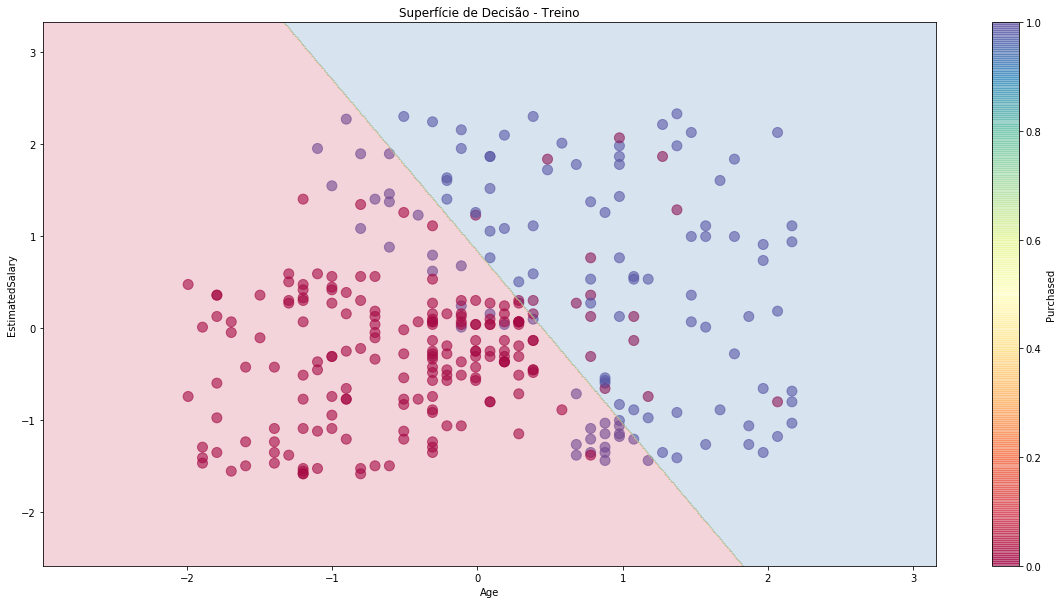

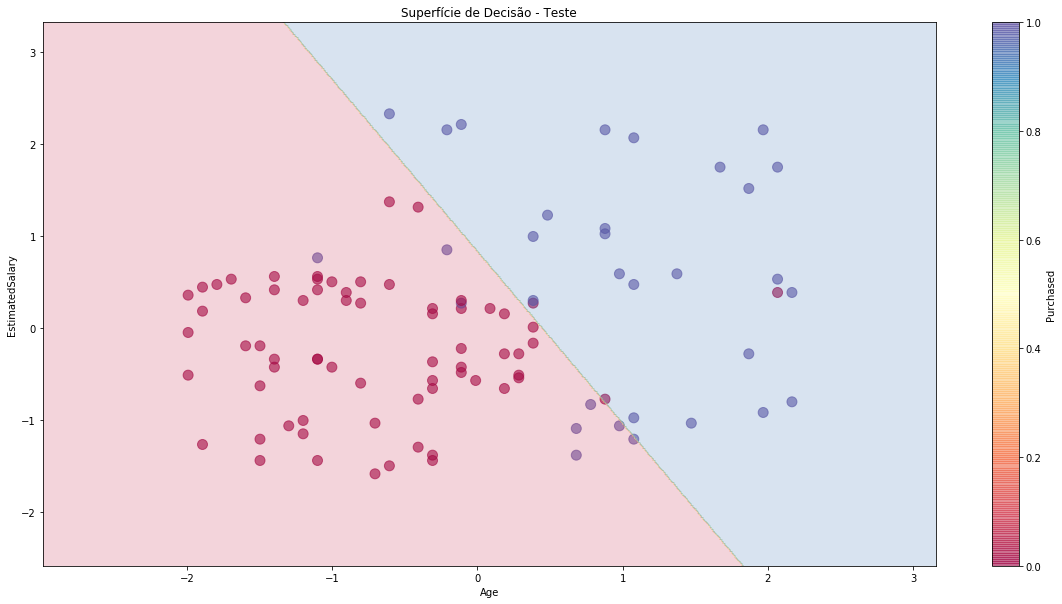

In [151]:
classifier = gridsearch.best_estimator_

plot_decision_function(x1_axis,x2_axis,target, proba=False)

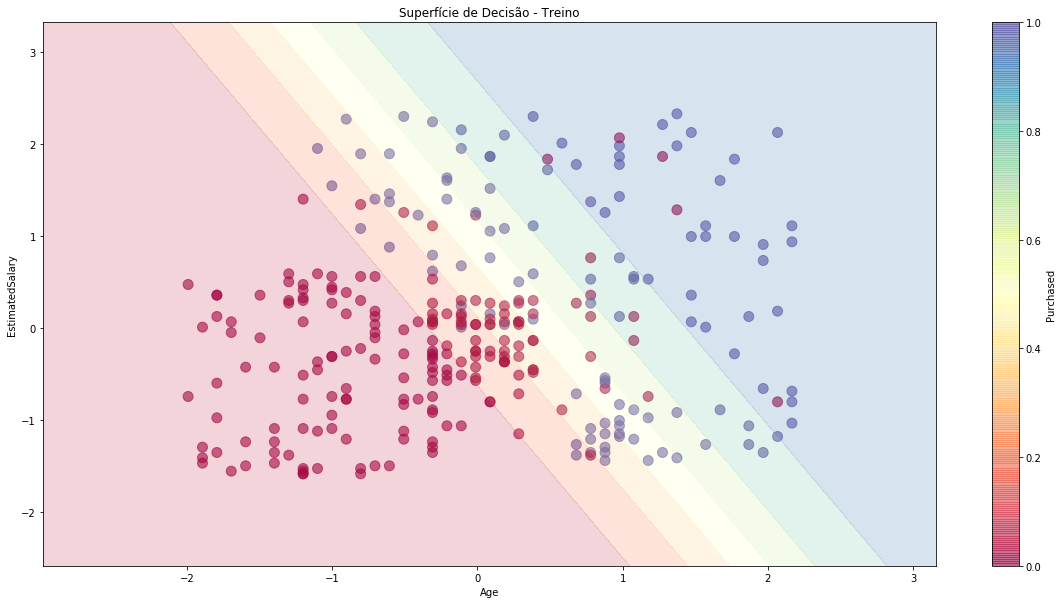

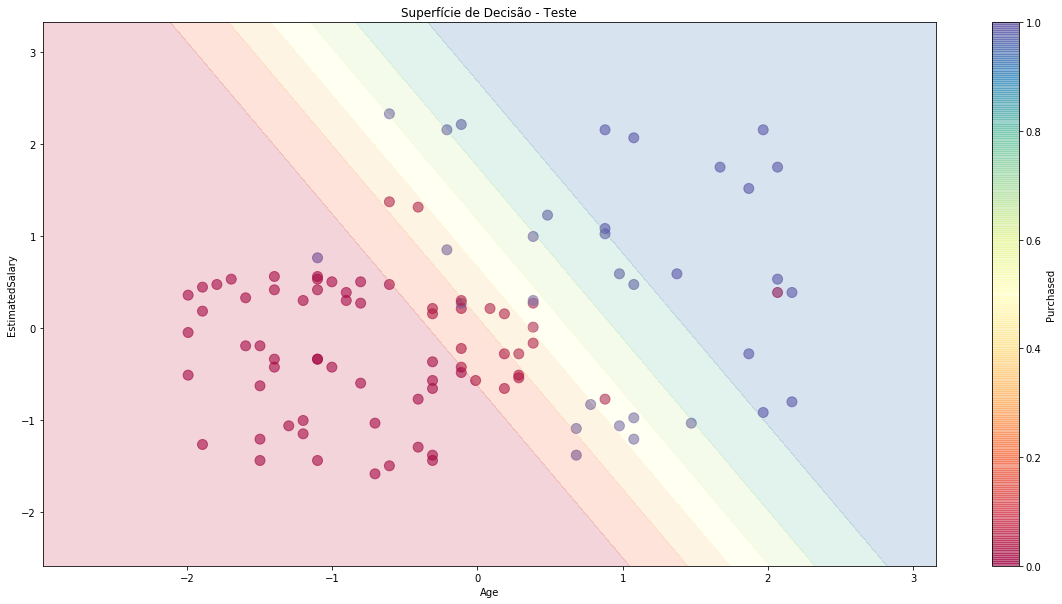

In [152]:
plot_decision_function(x1_axis,x2_axis,target, proba=True)

# Case 1 - Cancer Dataset

In [124]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss


load_df = load_breast_cancer()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

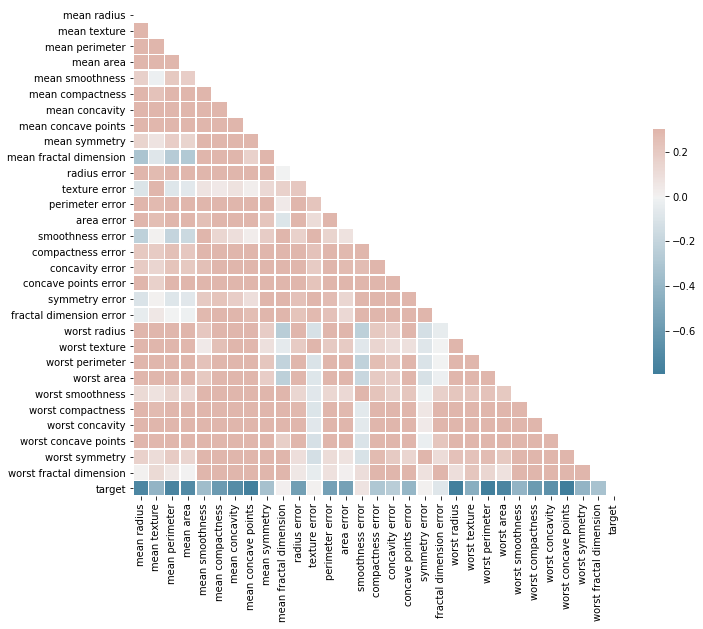

In [125]:
EDA.print_correlation_matrix(dataset, annot=False)

In [126]:
X_train, X_test, y_train, y_test= train_test_split(dataset.drop(columns = 'target'),
                                                   dataset['target'],
                                                   test_size=1/3, 
                                                   random_state=42)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

# Aplicando Min Max Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train[X_train.columns.to_list()] = scaler.transform(X_train)
X_test[X_train.columns.to_list()] = scaler.transform(X_test)

X_train shape:(379, 30)
y_train shape:(379,)
X_test shape:(190, 30)
y_test shape:(190,)


In [128]:
classifier = LogisticRegression(random_state=42)

classifier.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.966
Test set score:0.963


# Regressão Logística com regularização

Assim como na regressão linear, pode-se adicionar um termo à função de custo correspondente à regularização - podendo ser do tipo l1 (lasso),l2 (ridge) ou elastic-net

Lasso:

$J(θ)=\frac{1}{m}\sum_{i=1}^{m}(−y_{i}.log⁡(h_{θ}(X_{i}))− (1−y_{i}).log⁡(1 − h_{θ}(X_{i}))) +\frac{λ}{2}\sum_{j=1}^{n}|θ_j|$

Ridge:

$J(θ)=\frac{1}{m}\sum_{i=1}^{m}(−y_{i}.log⁡(h_{θ}(X_{i}))− (1−y_{i}).log⁡(1 − h_{θ}(X_{i}))) +\frac{λ}{2}\sum_{j=1}^{n}(θ_j)²$


In [136]:
sum(X_train.iloc[0,:]*classifier.coef_[0]) + classifier.intercept_

array([-647.82358042])

In [137]:
classifier.intercept_

array([471.32584494])

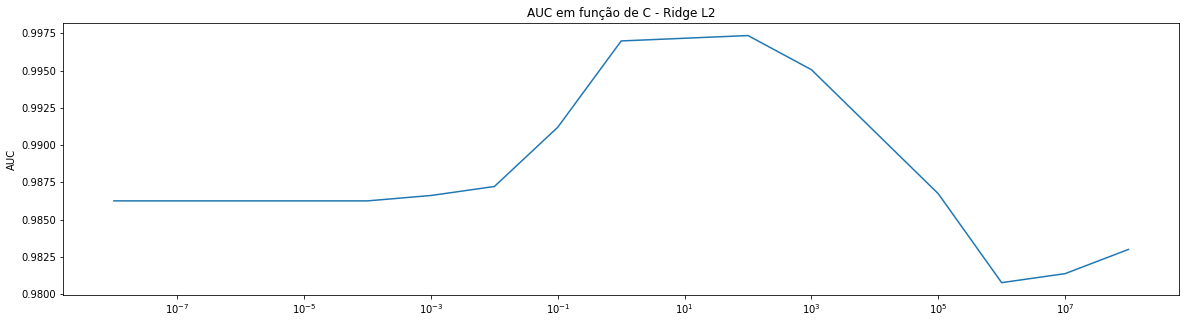

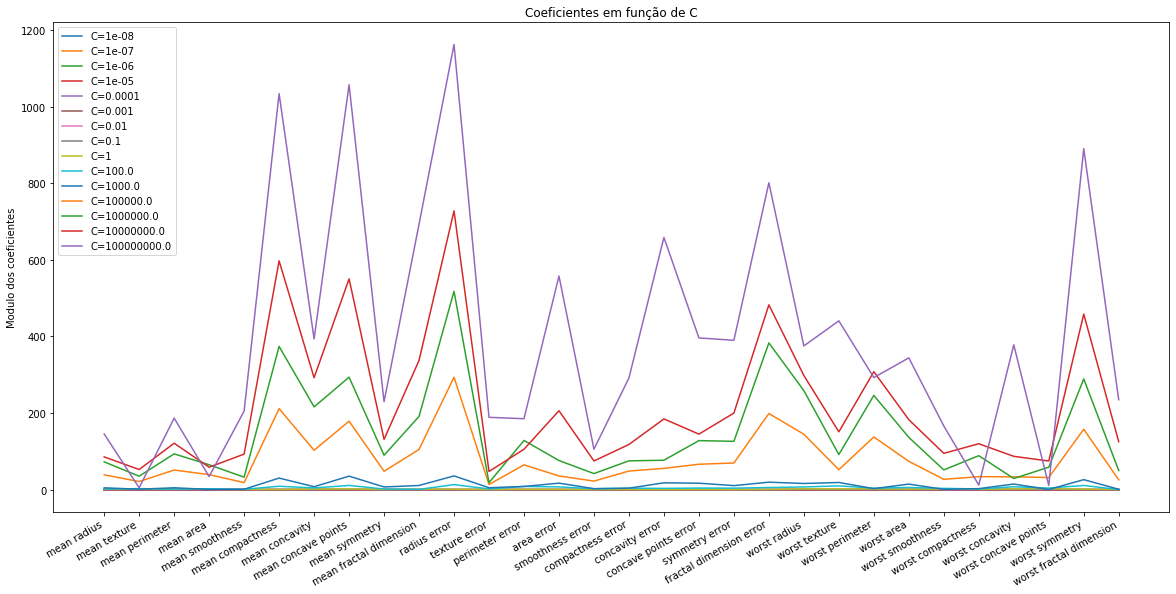

In [129]:
betas = {}
roc_auc={}

# for C in [.0001,.001, .01,.1,1,10,100,1000,10000,100000]:
for C in [1e-8,1e-7,1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1,1, 1e2,1e3,1e5,1e6,1e7, 1e8]:
    classifier= LogisticRegression(penalty='l2',C=C, max_iter=1000)
    classifier.fit(X_train, y_train)
    betas[C] = classifier.coef_[0]
    roc_auc[C] = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,-1])
#     y_pred_proba = classifier.predict_proba(X_test)

fig, axis = plt.subplots(1,1, figsize=(20,5))

plt.plot(list(roc_auc.keys()), list(roc_auc.values()))
plt.xscale('log')
plt.ylabel('AUC')
plt.title('AUC em função de C - Ridge L2')
plt.show()

fig, axis = plt.subplots(1,1, figsize=(20,10))

for betas_ in betas.keys():
    plt.plot(X_train.columns, abs(betas[betas_]), label='C={}'.format(betas_))
    plt.legend()
    plt.title('Coeficientes em função de C')
    fig.autofmt_xdate()
plt.ylabel('Modulo dos coeficientes')
plt.show()

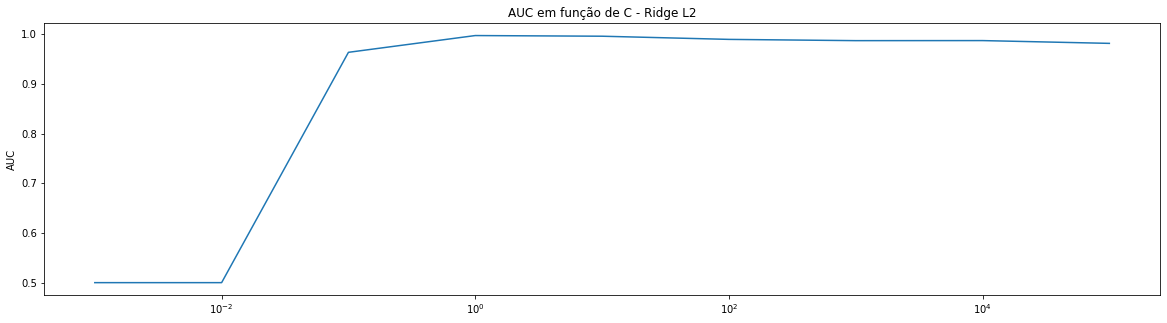

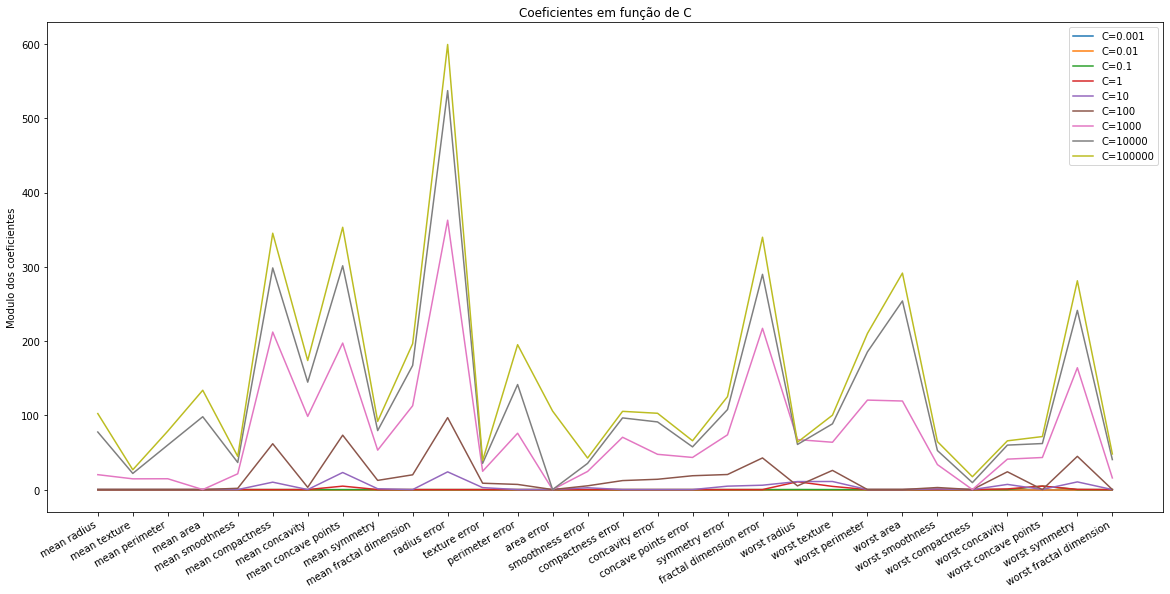

In [97]:
betas = {}
roc_auc={}

# for C in [.0001,.001, .01,.1,1,10,100,1000,10000,100000]:
for C in [.001, .01,.1,1,10,100,1000,10000,100000]:
    classifier= LogisticRegression(penalty='l1',C=C, solver = 'liblinear', max_iter=1000)
    classifier.fit(X_train, y_train)
    betas[C] = classifier.coef_[0]
    roc_auc[C] = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,-1])
#     y_pred_proba = classifier.predict_proba(X_test)

fig, axis = plt.subplots(1,1, figsize=(20,5))

plt.plot(list(roc_auc.keys()), list(roc_auc.values()))
plt.ylabel('AUC')
plt.xscale('log')
plt.title('AUC em função de C - Ridge L2')
plt.show()

fig, axis = plt.subplots(1,1, figsize=(20,10))

for betas_ in betas.keys():
    plt.plot(X_train.columns, abs(betas[betas_]), label='C={}'.format(betas_))
    plt.legend()
    plt.title('Coeficientes em função de C')
    fig.autofmt_xdate()
plt.ylabel('Modulo dos coeficientes')
plt.show()


In [108]:
coeficientes = {}
for C_ in betas.keys():
    coeficientes[C_] = list(X_train.columns[[x>0 for x in betas[C_]]])

In [109]:
coeficientes

{0.001: [],
 0.01: [],
 0.1: [],
 1: [],
 10: ['mean compactness',
  'mean symmetry',
  'texture error',
  'symmetry error',
  'fractal dimension error'],
 100: ['mean smoothness',
  'mean compactness',
  'mean symmetry',
  'texture error',
  'perimeter error',
  'concavity error',
  'symmetry error',
  'fractal dimension error',
  'worst smoothness'],
 1000: ['mean radius',
  'mean perimeter',
  'mean smoothness',
  'mean compactness',
  'mean symmetry',
  'texture error',
  'perimeter error',
  'concavity error',
  'symmetry error',
  'fractal dimension error',
  'worst perimeter',
  'worst smoothness',
  'worst fractal dimension'],
 10000: ['mean radius',
  'mean perimeter',
  'mean smoothness',
  'mean compactness',
  'mean symmetry',
  'texture error',
  'perimeter error',
  'concavity error',
  'symmetry error',
  'fractal dimension error',
  'worst perimeter',
  'worst smoothness',
  'worst fractal dimension'],
 100000: ['mean radius',
  'mean perimeter',
  'mean smoothness',
  

In [26]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

print(classification_report(y_train,classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.95      0.96      0.96       267

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426



In [29]:
results =model_functions.metrics(classifier, 'classification', X_train, X_test, y_train, y_test)
pd.DataFrame(results)


### TREINO:###

accuracy:  0.9437
precision:  0.9483
recall:  0.9625
f1:  0.9554
log_loss:  1.9459
roc_auc:  0.9908

### TESTE:###

accuracy:  0.958
precision:  0.9468
recall:  0.9889
f1:  0.9674
log_loss:  1.4492
roc_auc:  0.9925


,train,test
accuracy,0.943662,0.958042
precision,0.948339,0.946809
recall,0.962547,0.988889
f1,0.955390,0.967391
log_loss,1.945873,1.449207
roc_auc,0.990813,0.992453
